In [1]:
import numpy as np
import matplotlib.pyplot as plt

report = ''
with open('report.txt', 'r') as f:
    report = f.read().split('\n')

prim_cmp = []
q_set = []
p_set = []
d_set = []
c_set = []

for line in report:
    if line == '':
        continue
    cat = line.split('_')
    prim_cmp += [cat[0]]
    q_set += [cat[1]]
    p_set += [cat[2]]
    d_set += [cat[3]]
    c_set += [cat[4].split(';')[0]]

prim_cmp = list(dict.fromkeys(prim_cmp))
q_set = list(dict.fromkeys(q_set))
p_set = list(dict.fromkeys(p_set))
d_set = list(dict.fromkeys(d_set))
c_set = list(dict.fromkeys(c_set))

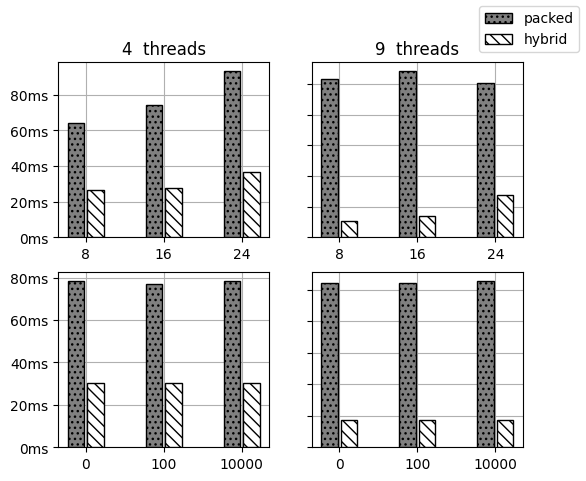

In [134]:
##### from cycler import cycler

# Style configuration
monochrome = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':']) * cycler('marker', ['^',',', '.']))
styles = [
          { 'color': 'grey', 'hatch': '...'},
          { 'color': 'white', 'hatch':'\\\\\\'},
          { 'color': 'white', 'hatch':'..'},
          { 'color': 'dimgrey', 'hatch':'xxxx'}
         ]
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.prop_cycle'] = monochrome

# returns values [y(px_0), y(px_1), ..., y(px_n)] 
# for given p0 and p1 features
def get_values_y(p0, p1, px):
    res = []
    for p in px:
        res += [[x for x in report if p0 in x and p1 in x and p in x]]  
    ys = []
    for r in res:
        tmp = 0
        for line in r:
            tmp += float(line.split(';')[1]) / len(r)
        ys += [tmp]
    return ys

# ax: rect
# cat: categories for bar chart (i.e. ['q8', 'q16', 'q32'])
# ys: bars per category
# bar_labels: labels of every bar
def plot_bars(ax, cat, ys, bar_labels):
    width = 0.25
    x = np.arange(len(cat))
    for i in range(len(ys)):
        # 0 1 2  - 
        ax.bar(x + (i - len(ys)/2) * width + width / 2, 
               ys[i], width * 0.85, 
               edgecolor = 'black',
               zorder = 10, **styles[i],
               label = bar_labels[i])
        ax.set_xticks(x, [c[1:] for c in cat])

def plot_row(axs, f_0, f_1, f_1_label, f_x, row_idx):
    axs[row_idx, 0].yaxis.set_major_formatter(lambda x, pos: str(int(x))+'ms')
    for i in range(0, len(axs[0])):
        if row_idx == 0:
            axs[row_idx, i].set_title(f'{f_1[i][1:]} {f_1_label}')

    for idx, f in enumerate(feature_1):
        ys = [get_values_y(_i, f, f_x) for _i in f_0]
        ax = axs[row_idx, idx]
        plot_bars(ax, f_x, ys, feature_0)
        

# What to render!
feature_1 = p_set    # horizontal feature
feature_1_label = ' threads' # name of the feature
row_sets = [q_set, d_set]  # x axis features

fig, axs = plt.subplots(len(row_sets), len(feature_1), figsize=(3 * len(feature_1), 5))

for (idx, row_set) in enumerate(row_sets):
    plot_row(axs, prim_cmp, feature_1, feature_1_label if idx == 0 else '', row_set, idx)

for i in range(0, len(axs[0])):
    for j in range(0, len(axs)):
        if not i == 0:
            axs[j, i].set(yticklabels=[])

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')